66


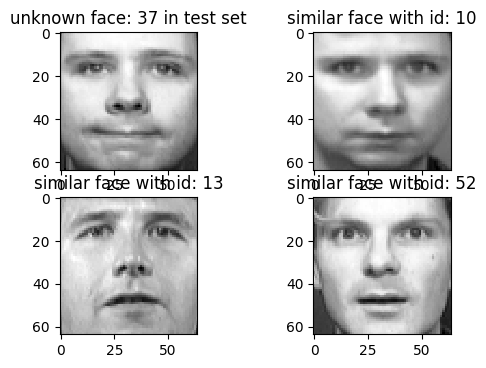

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
%matplotlib inline
dataset  = fetch_olivetti_faces(shuffle=True, random_state=101)
train_faces = dataset.data[:350, :]
test_faces = dataset.data[350:, :]
train_answers = dataset.target[:350]
test_answers = dataset.data[350:]
photo = 37

rcpa = PCA(n_components=25, whiten=True, random_state=101).fit(train_faces)
cmp_train = rcpa.transform(train_faces)
cmp_test = rcpa.transform(test_faces)

mask = cmp_test[photo]
sq_errs = np.sum((cmp_train - mask) ** 2, axis=1)
most_res = list(np.where(sq_errs < 20)[0])
plt.subplot(2, 2, 1)
plt.title('unknown face: ' + str(photo) + ' in test set')
plt.imshow(test_faces[photo].reshape(64, 64), cmap=plt.cm.gray, interpolation='nearest')

for k, m in enumerate(most_res[:3]):
    plt.subplot(2, 2, 2 + k)
    plt.title('similar face with id: %i'%m)
    plt.imshow(train_faces[m].reshape(64, 64), cmap=plt.cm.gray, interpolation='nearest')